In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split # يقسم البيانات لجزء يختبره وجزء يتدرب عليه

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix # لقياس مدى نجاح التنبؤ
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.metrics import classification_report

# Expolre data

In [4]:
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')
#Explore Data

data = pd.read_csv('diabetes.csv')
first5_data = data.head()
data.info()
data.describe()
test = data.duplicated().sum() # حساب البيانات التي فيها تكرارات

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Analysis

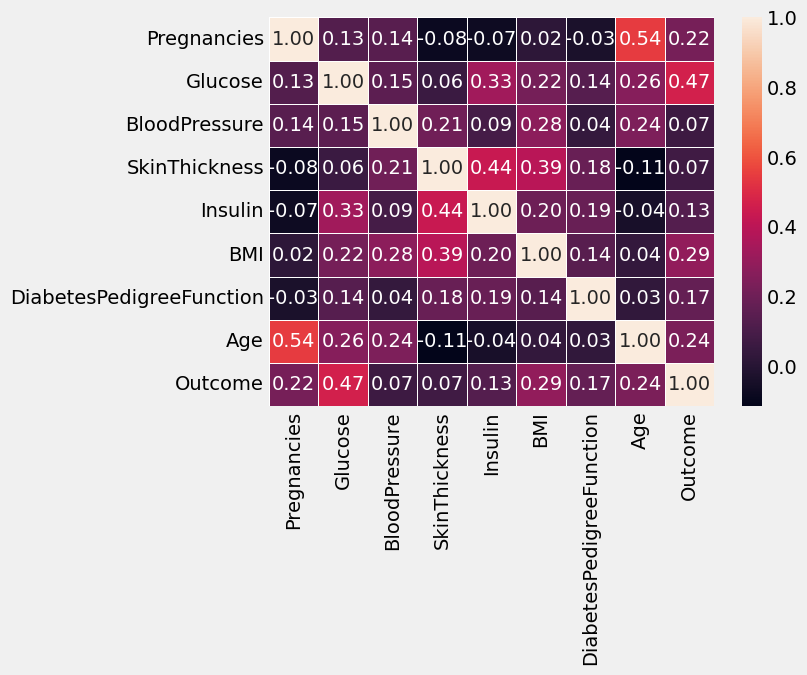

In [5]:
data.corr() #حساب العلاقات بين الأعمدة 
sns.heatmap(data.corr(),annot=True,fmt='0.2f',linewidths=.5)

plt.show()

<Axes: xlabel='Outcome', ylabel='count'>

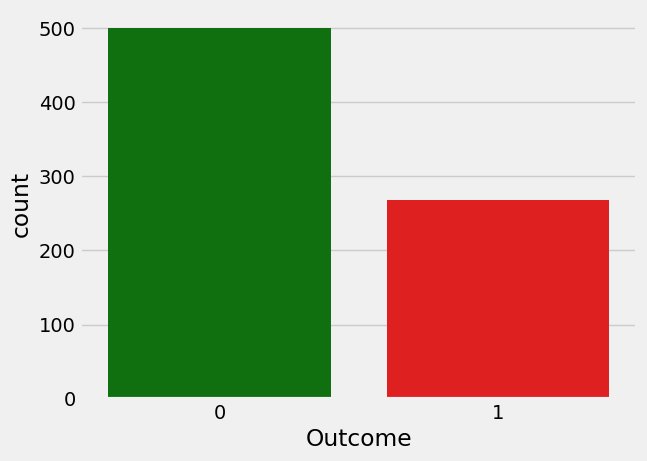

In [10]:
sns.countplot(x='Outcome', data=data,palette=['g','r'])


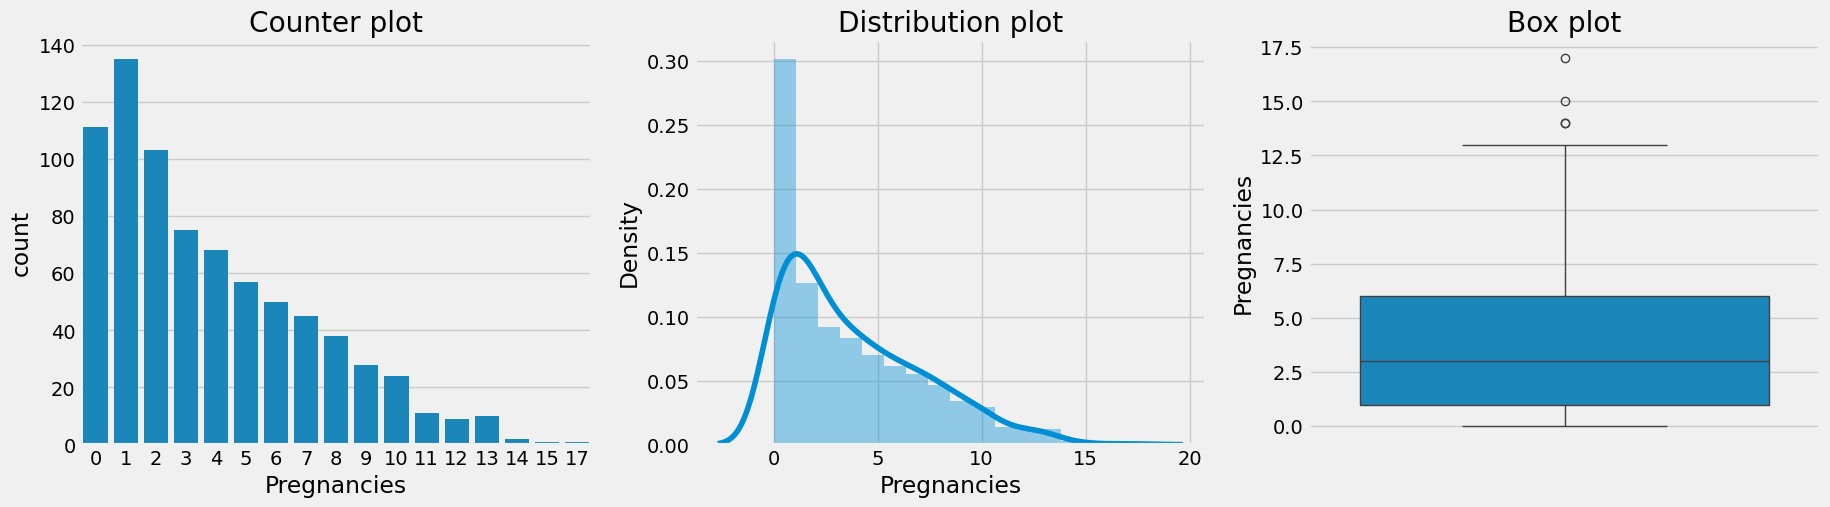

In [15]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.title('Counter plot')
sns.countplot(x='Pregnancies',data=data)

plt.subplot(1,3,2)
plt.title('Distribution plot')
sns.distplot(data['Pregnancies'])

plt.subplot(1,3,3)
plt.title('Box plot')
sns.boxplot(y=data['Pregnancies'])
plt.show()

<Axes: ylabel='Age'>

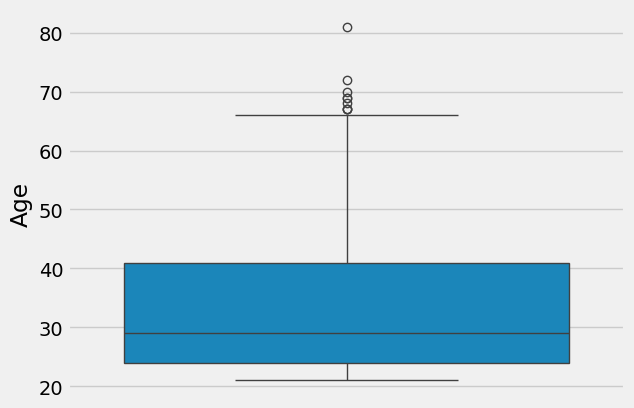

In [16]:
sns.boxplot(data.Age)

# Create Model

In [20]:
x = data.drop('Outcome',axis=1)
y = data['Outcome']

In [21]:
x_train , x_test ,y_train , y_test = train_test_split(x,y,test_size=.2,randomstate)


In [56]:
model_1 = LogisticRegression()
model_2 = SVC()
model_3 = RandomForestClassifier()
model_4 = GradientBoostingClassifier(n_estimators=1000)

In [71]:
columns = ['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier']
result_1=[]
result_2=[]
result_3=[]

In [95]:
def cal (model):
    model.fit(x_train,y_train) #تدريب 
    pre = model.predict(x_test) #توقع
    
    accuracy= accuracy_score(pre,y_test) #قياس الأداء
    recall= recall_score(pre,y_test) #قياس الأداء 2
    f1= f1_score(pre,y_test) #قياس الأداء 3 
    
    result_1.append(accuracy)
    result_2.append(recall)
    result_3.append(f1)
    
    sns.heatmap(confusion_matrix(pre,y_test),annot=True)  
    print(model)
    print('accuracy is :', accuracy,'recall is :', recall,accuracy,'f1 is :', f1)


LogisticRegression()
accuracy is : 0.7708333333333334 recall is : 0.7872340425531915 0.7708333333333334 f1 is : 0.6271186440677966


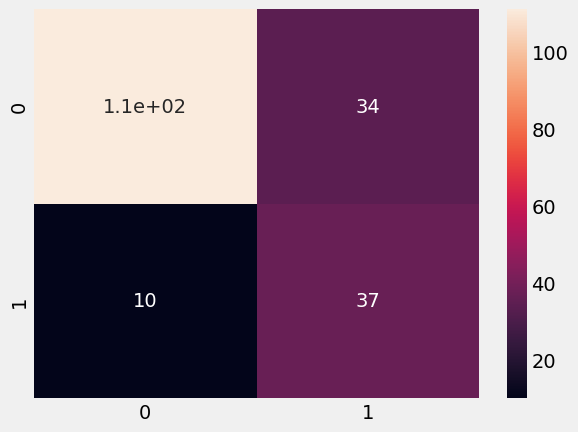

In [129]:
cal(model_1)

SVC()
accuracy is : 0.7395833333333334 recall is : 0.7837837837837838 0.7395833333333334 f1 is : 0.5370370370370371


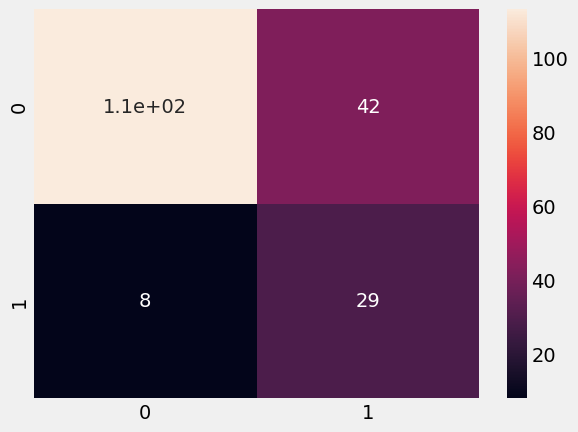

In [130]:
cal(model_2)

RandomForestClassifier()
accuracy is : 0.7291666666666666 recall is : 0.6727272727272727 0.7291666666666666 f1 is : 0.5873015873015873


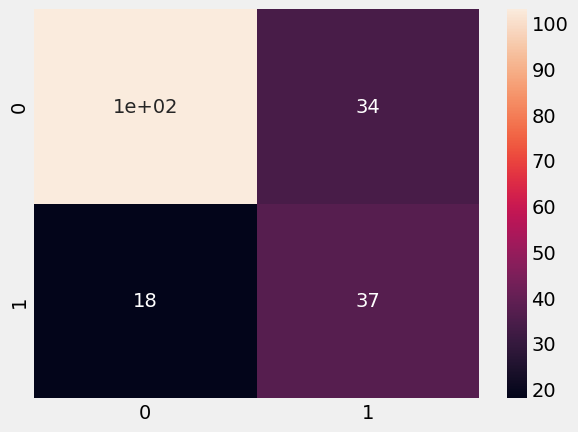

In [131]:
cal(model_3)

GradientBoostingClassifier(n_estimators=1000)
accuracy is : 0.734375 recall is : 0.6515151515151515 0.734375 f1 is : 0.6277372262773723


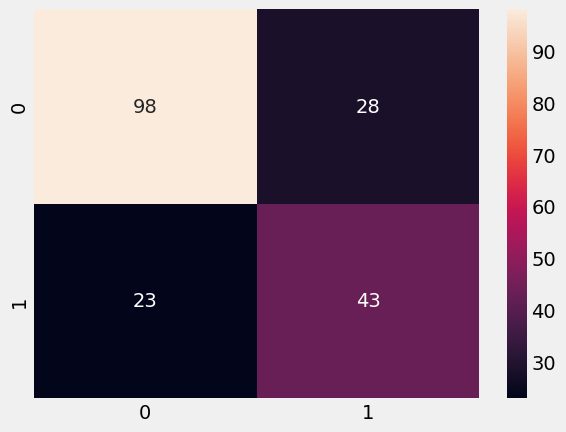

In [132]:
cal(model_4)

In [133]:
result_1

[0.7708333333333334, 0.7395833333333334, 0.7291666666666666, 0.734375]

In [134]:
result_2

[0.7872340425531915,
 0.7837837837837838,
 0.6727272727272727,
 0.6515151515151515]

In [135]:
result_3

[0.6271186440677966,
 0.5370370370370371,
 0.5873015873015873,
 0.6277372262773723]

In [143]:
print(len(columns))
print(len(result_1))
print(len(result_2))
print(len(result_3))

Final_Result= pd.DataFrame({'Algorithm': columns,'Accuracies':result_1,'Recall':result_2,'FScore':result_3})


4
4
4
4


,Algorithm,Accuracies,Recall,FScore
0,LogisticRegression,0.770833,0.787234,0.627119
1,SVC,0.739583,0.783784,0.537037
2,RandomForestClassifier,0.729167,0.672727,0.587302
3,GradientBoostingClassifier,0.734375,0.651515,0.627737


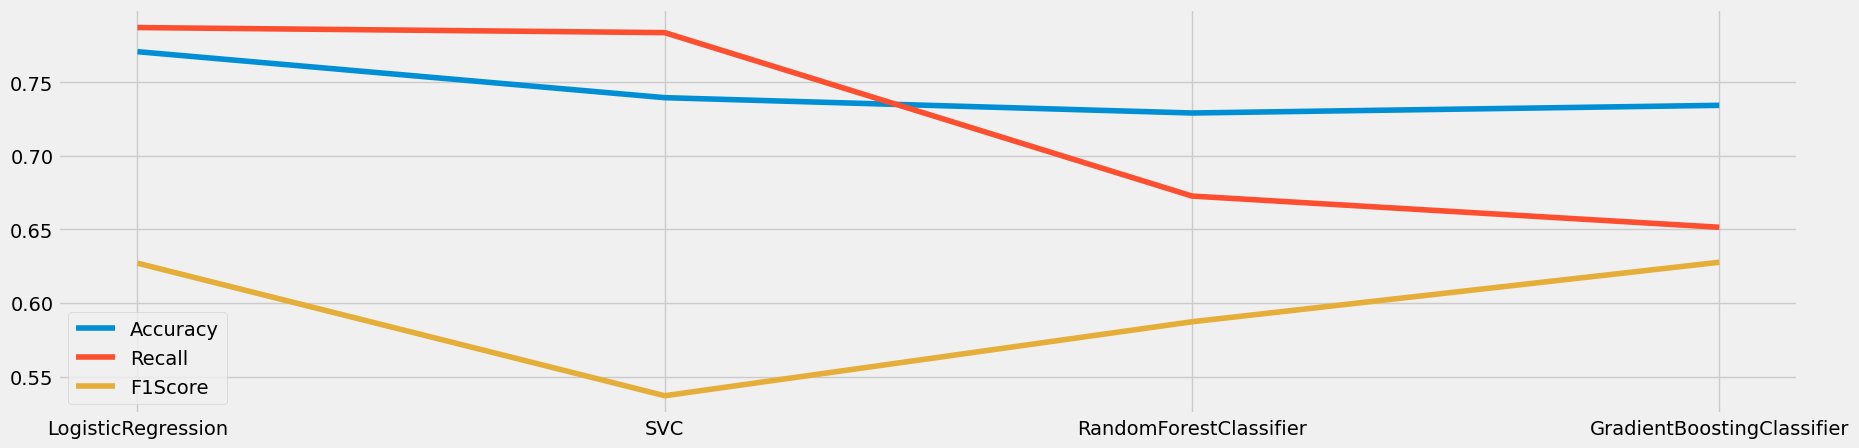

In [150]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(Final_Result.Algorithm,result_1,label='Accuracy')
plt.plot(Final_Result.Algorithm,result_2,label='Recall')
plt.plot(Final_Result.Algorithm,result_3,label='F1Score')
plt.legend()
plt.show()